<a href="https://colab.research.google.com/github/rafael2ll/spain_wheater/blob/master/wheather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn import metrics
from random import randint
from keras import backend as K
from sklearn.model_selection import train_test_split  

K.tensorflow_backend._get_available_gpus()
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [0]:
clima = pd.read_csv('./wheater_data_spain1.csv')
# clima_2 = pd.read_csv('./2005-2009_weather-data-spain.csv')
# clima =pd.concat([clima, clima_2])

In [0]:
print(clima.info())
clima.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167484 entries, 0 to 167483
Data columns (total 27 columns):
station_id                       167484 non-null object
station_name                     167484 non-null object
lat                              123698 non-null float64
lat_dir                          123698 non-null object
long                             123698 non-null float64
long_dir                         123698 non-null object
altitude                         167484 non-null int64
town                             123698 non-null object
province                         167484 non-null object
year                             167484 non-null int64
month                            167484 non-null int64
day                              167484 non-null int64
max_temp                         166749 non-null float64
max_temp_time                    164889 non-null object
min_temp                         166748 non-null float64
min_temp_time                    164865 non-null 

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,8.9,14.0,13:06,2.8,0,8.7,1008.6,24,1007.0,18
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2002,...,8.6,11.0,10:28,3.6,0,3.6,1012.5,9,1010.3,16
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,6.4,21.0,13:26,1.9,2.4,0.0,1002.1,0,996.9,16
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,11.9,30.0,0:22,6.1,0.4,7.9,1000.1,9,995.0,0
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2003,...,8.1,15.0,13:30,3.6,0,9.9,1006.5,8,1003.8,24


In [0]:
clima_cropped = clima.drop(['station_name', 'lat_dir', 'long_dir', 'town', 'province', 'max_wind_direction', 'max_wind_time','max_atmospheric_pressure_hour', 'min_atmospheric_pressure_hour'], axis = 1)

In [0]:
clima_cropped.describe()

,lat,long,altitude,year,month,day,max_temp,min_temp,avg_temp,max_wind,avg_wind,sun,max_atmospheric_pressure,min_atmospheric_pressure
count,123698.000000,123698.000000,167484.000000,167484.000000,167484.000000,167484.000000,166749.000000,166748.000000,166747.000000,159361.000000,161578.000000,155732.000000,162307.000000,162296.000000
mean,38.348429,-4.993994,381.243307,2002.009517,6.525017,15.732416,20.857015,10.700640,15.778729,10.161925,3.307161,7.122534,976.321492,972.109806
std,4.455882,5.043453,423.050534,1.415397,3.445729,8.801899,7.661328,6.687258,6.812713,4.021948,2.146136,4.117430,46.899256,46.870605
min,27.490800,-17.532000,2.000000,2000.000000,1.000000,1.000000,-8.000000,-24.000000,-13.700000,0.000000,0.000000,0.000000,754.300000,739.900000
25%,37.112300,-6.485000,35.000000,2001.000000,4.000000,8.000000,15.200000,6.000000,10.700000,7.200000,1.900000,3.800000,944.700000,940.600000
50%,39.530500,-4.073500,192.000000,2002.000000,7.000000,16.000000,20.600000,10.800000,15.800000,9.400000,2.800000,7.800000,994.900000,989.700000
75%,41.305600,-1.514400,639.000000,2003.000000,10.000000,23.000000,26.500000,15.900000,21.100000,12.200000,4.200000,10.400000,1014.500000,1010.600000
max,43.340100,4.125600,2371.000000,2004.000000,12.000000,31.000000,46.200000,33.200000,36.800000,42.500000,23.300000,15.100000,1041.100000,1039.600000


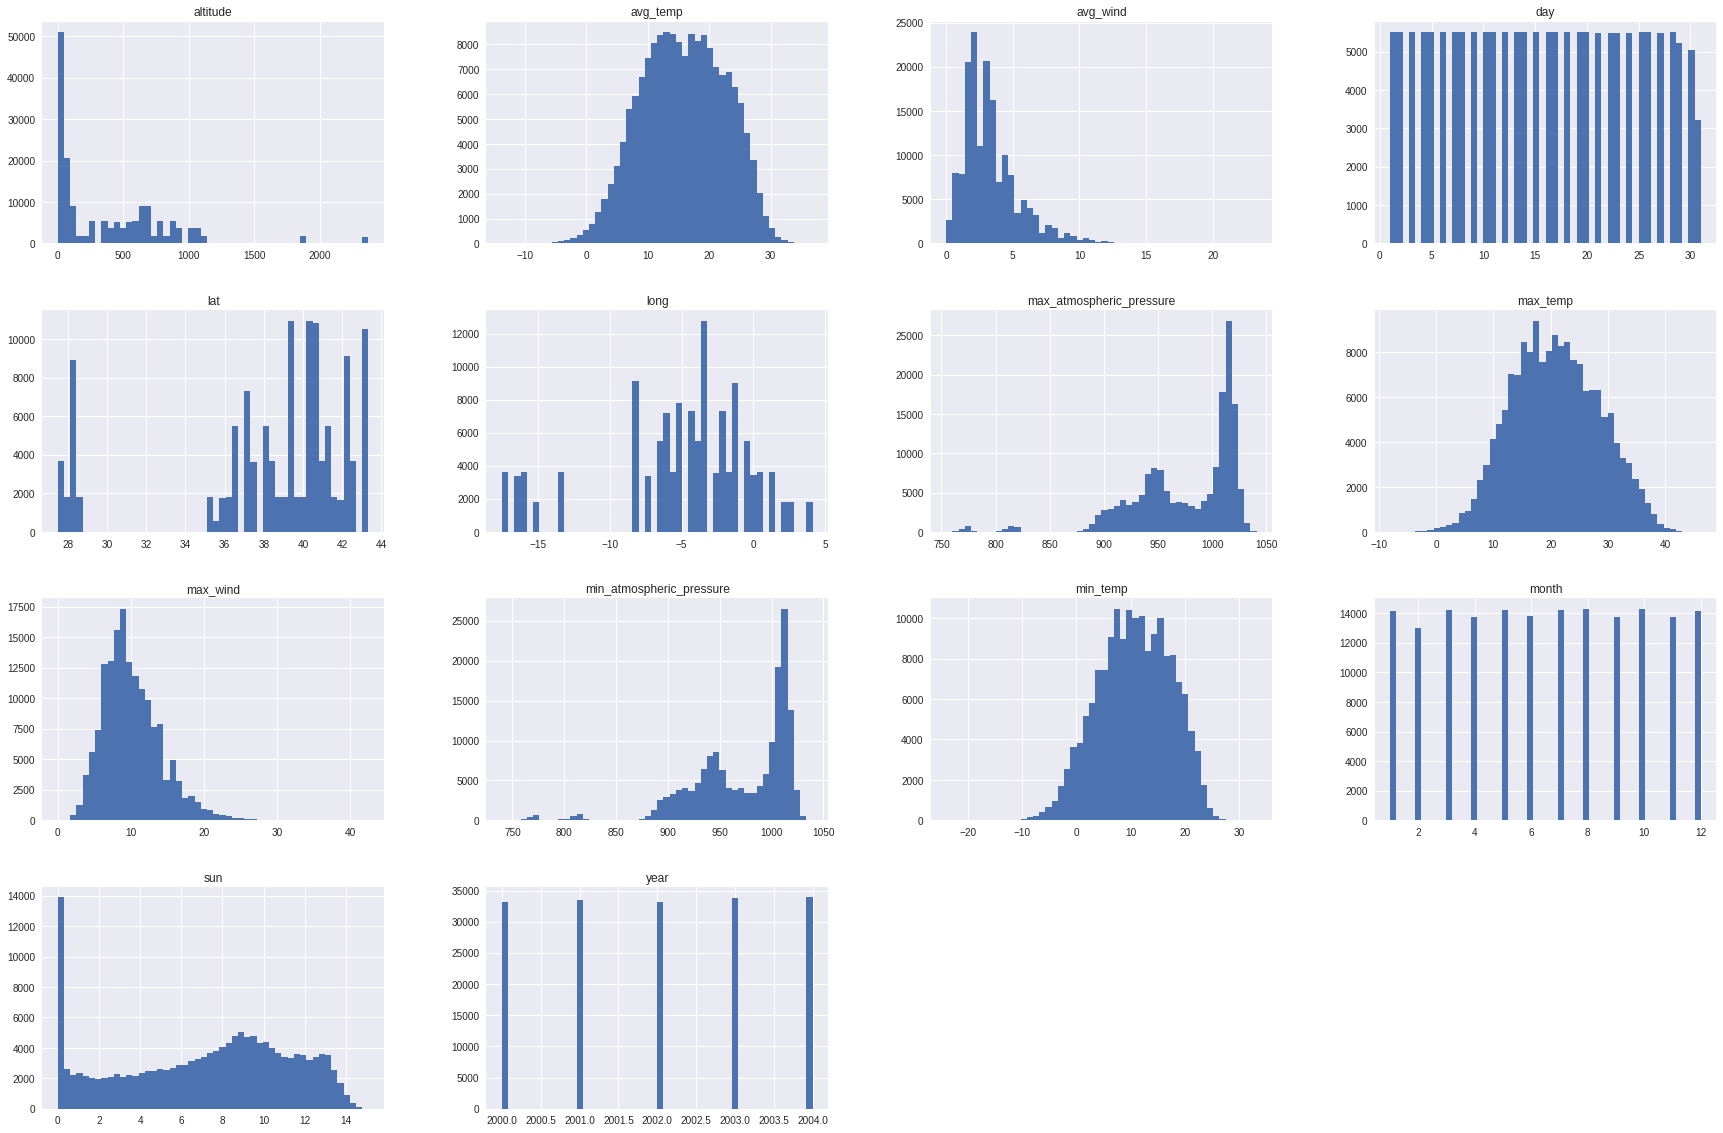

In [0]:
clima_cropped.hist(bins=50, figsize=(30,20))
plt.show()

In [0]:
clima_cropped.corr()

,lat,long,altitude,year,month,day,max_temp,min_temp,avg_temp,max_wind,avg_wind,sun,max_atmospheric_pressure,min_atmospheric_pressure
lat,1.000000,0.704147,0.137283,0.000400,-0.000832,0.000401,-0.195565,-0.410234,-0.312195,-0.181525,-0.412408,-0.130590,-0.169953,-0.179624
long,0.704147,1.000000,0.010442,0.001121,0.000754,0.000581,-0.039771,-0.231193,-0.136667,-0.157709,-0.335026,0.011101,-0.042612,-0.049491
altitude,0.137283,0.010442,1.000000,-0.005637,-0.001590,-0.000997,-0.227044,-0.411025,-0.329405,-0.004184,-0.060229,0.014775,-0.991515,-0.988932
year,0.000400,0.001121,-0.005637,1.000000,-0.000778,0.000048,0.002990,0.022614,0.012770,0.024141,0.034039,-0.020804,0.004661,0.005307
month,-0.000832,0.000754,-0.001590,-0.000778,1.000000,0.009772,0.163709,0.213990,0.197070,-0.028584,-0.033824,-0.046242,-0.012754,-0.011310
day,0.000401,0.000581,-0.000997,0.000048,0.009772,1.000000,0.023874,0.017512,0.022015,0.009783,0.002787,0.025668,-0.004162,-0.006005
max_temp,-0.195565,-0.039771,-0.227044,0.002990,0.163709,0.023874,1.000000,0.802554,0.956169,-0.025950,0.003473,0.617373,0.221050,0.233797
min_temp,-0.410234,-0.231193,-0.411025,0.022614,0.213990,0.017512,0.802554,1.000000,0.942050,0.132023,0.217972,0.311205,0.392415,0.403041
avg_temp,-0.312195,-0.136667,-0.329405,0.012770,0.197070,0.022015,0.956169,0.942050,1.000000,0.050497,0.109142,0.499402,0.316755,0.329133
max_wind,-0.181525,-0.157709,-0.004184,0.024141,-0.028584,0.009783,-0.025950,0.132023,0.050497,1.000000,0.760888,-0.079431,-0.039562,-0.055731


In [0]:

data_formatada = clima_cropped['year']*clima_cropped['month'] + clima_cropped['day']
data_formatada = pd.Series(data_formatada, name = 'date')
clima_dated = clima_cropped.drop(['year', 'month', 'day'], axis = 1 )
clima = pd.concat([clima_dated, data_formatada], axis = 1)

In [0]:
clima.dropna(inplace=True)
clima.corr()

,lat,long,altitude,max_temp,min_temp,avg_temp,max_wind,avg_wind,sun,max_atmospheric_pressure,min_atmospheric_pressure,date
lat,1.000000,0.704399,0.219580,-0.215134,-0.428446,-0.332900,-0.178274,-0.412025,-0.123665,-0.230406,-0.240468,-0.001013
long,0.704399,1.000000,0.093936,-0.054782,-0.257621,-0.158722,-0.169174,-0.344700,0.021222,-0.105266,-0.112617,0.000924
altitude,0.219580,0.093936,1.000000,-0.252659,-0.434743,-0.356919,0.006373,-0.110545,-0.007336,-0.991888,-0.989454,0.001651
max_temp,-0.215134,-0.054782,-0.252659,1.000000,0.800539,0.954443,-0.024297,0.033732,0.622008,0.242118,0.254907,0.165599
min_temp,-0.428446,-0.257621,-0.434743,0.800539,1.000000,0.942875,0.143703,0.266922,0.314557,0.415719,0.426403,0.213440
avg_temp,-0.332900,-0.158722,-0.356919,0.954443,0.942875,1.000000,0.058047,0.151669,0.502360,0.341588,0.354016,0.198304
max_wind,-0.178274,-0.169174,0.006373,-0.024297,0.143703,0.058047,1.000000,0.748466,-0.071264,-0.037524,-0.051520,-0.027905
avg_wind,-0.412025,-0.344700,-0.110545,0.033732,0.266922,0.151669,0.748466,1.000000,0.027199,0.097939,0.093893,-0.033507
sun,-0.123665,0.021222,-0.007336,0.622008,0.314557,0.502360,-0.071264,0.027199,1.000000,0.022773,0.035533,-0.047673
max_atmospheric_pressure,-0.230406,-0.105266,-0.991888,0.242118,0.415719,0.341588,-0.037524,0.097939,0.022773,1.000000,0.998547,-0.017480


In [0]:
print(clima.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110776 entries, 0 to 167483
Data columns (total 16 columns):
station_id                  110776 non-null object
lat                         110776 non-null float64
long                        110776 non-null float64
altitude                    110776 non-null int64
max_temp                    110776 non-null float64
max_temp_time               110776 non-null object
min_temp                    110776 non-null float64
min_temp_time               110776 non-null object
avg_temp                    110776 non-null float64
max_wind                    110776 non-null float64
avg_wind                    110776 non-null float64
rainfall                    110776 non-null object
sun                         110776 non-null float64
max_atmospheric_pressure    110776 non-null float64
min_atmospheric_pressure    110776 non-null float64
date                        110776 non-null int64
dtypes: float64(10), int64(2), object(4)
memory usage: 14.4+ MB
N

#### Handling with no-time-object-type columns

In [0]:
clima.where(clima != 'Varias', np.nan, inplace=True)
clima.where(clima != 'Ip', np.nan, inplace= True)
clima.where(clima != 'Acum', np.nan, inplace= True)
clima.fillna(clima.median(), inplace=True)
clima['rainfall'] =  pd.to_numeric(clima['rainfall'])
clima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110776 entries, 0 to 167483
Data columns (total 16 columns):
station_id                  110776 non-null object
lat                         110776 non-null float64
long                        110776 non-null float64
altitude                    110776 non-null int64
max_temp                    110776 non-null float64
max_temp_time               104061 non-null object
min_temp                    110776 non-null float64
min_temp_time               99855 non-null object
avg_temp                    110776 non-null float64
max_wind                    110776 non-null float64
avg_wind                    110776 non-null float64
rainfall                    106027 non-null float64
sun                         110776 non-null float64
max_atmospheric_pressure    110776 non-null float64
min_atmospheric_pressure    110776 non-null float64
date                        110776 non-null int64
dtypes: float64(11), int64(2), object(3)
memory usage: 14.4+ MB


### Handling with time object columns

In [0]:
def extract_time(serie):
    time_serie = pd.to_datetime(serie).dt.time
    returned = []
    for x in time_serie:
      if(type(x)!= float):
        returned.append(x.hour*60 + x.minute)
      else:
        returned.append(np.nan)
    return returned

min_temptime = extract_time(clima['min_temp_time'])
max_temptime = extract_time(clima['max_temp_time'])

In [0]:
clima['min_temp_time'] = pd.Series(min_temptime, dtype=np.float)
clima['max_temp_time'] = pd.Series(max_temptime, dtype= np.float)

In [0]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110776 entries, 0 to 167483
Data columns (total 16 columns):
station_id                  110776 non-null object
lat                         110776 non-null float64
long                        110776 non-null float64
altitude                    110776 non-null int64
max_temp                    110776 non-null float64
max_temp_time               62917 non-null float64
min_temp                    110776 non-null float64
min_temp_time               60712 non-null float64
avg_temp                    110776 non-null float64
max_wind                    110776 non-null float64
avg_wind                    110776 non-null float64
rainfall                    106027 non-null float64
sun                         110776 non-null float64
max_atmospheric_pressure    110776 non-null float64
min_atmospheric_pressure    110776 non-null float64
date                        110776 non-null int64
dtypes: float64(13), int64(2), object(1)
memory usage: 14.4+ MB


In [0]:
clima.isnull().values.any()
clima.fillna(clima.median(), inplace=True)

### Handling  zero-sun rows

In [0]:
sun_ = []
sun_median = clima.sun.median()
for (temp, sun) in zip(clima['avg_temp'], clima['sun']):
    if sun == 0 and temp < 15:
      sun_.append(randint(0,5))
    elif sun == 0:
      sun_.append(randint(5, 12))
    else:
      sun_.append(sun)
print(len(sun_))
clima['sun'] = sun_
clima.corr()['sun']

110776


lat                        -0.111587
long                        0.025668
altitude                   -0.013958
max_temp                    0.615249
max_temp_time              -0.024538
min_temp                    0.327154
min_temp_time              -0.017729
avg_temp                    0.504873
max_wind                   -0.068691
avg_wind                    0.027459
rainfall                   -0.305906
sun                         1.000000
max_atmospheric_pressure    0.028312
min_atmospheric_pressure    0.040579
date                       -0.041518
Name: sun, dtype: float64

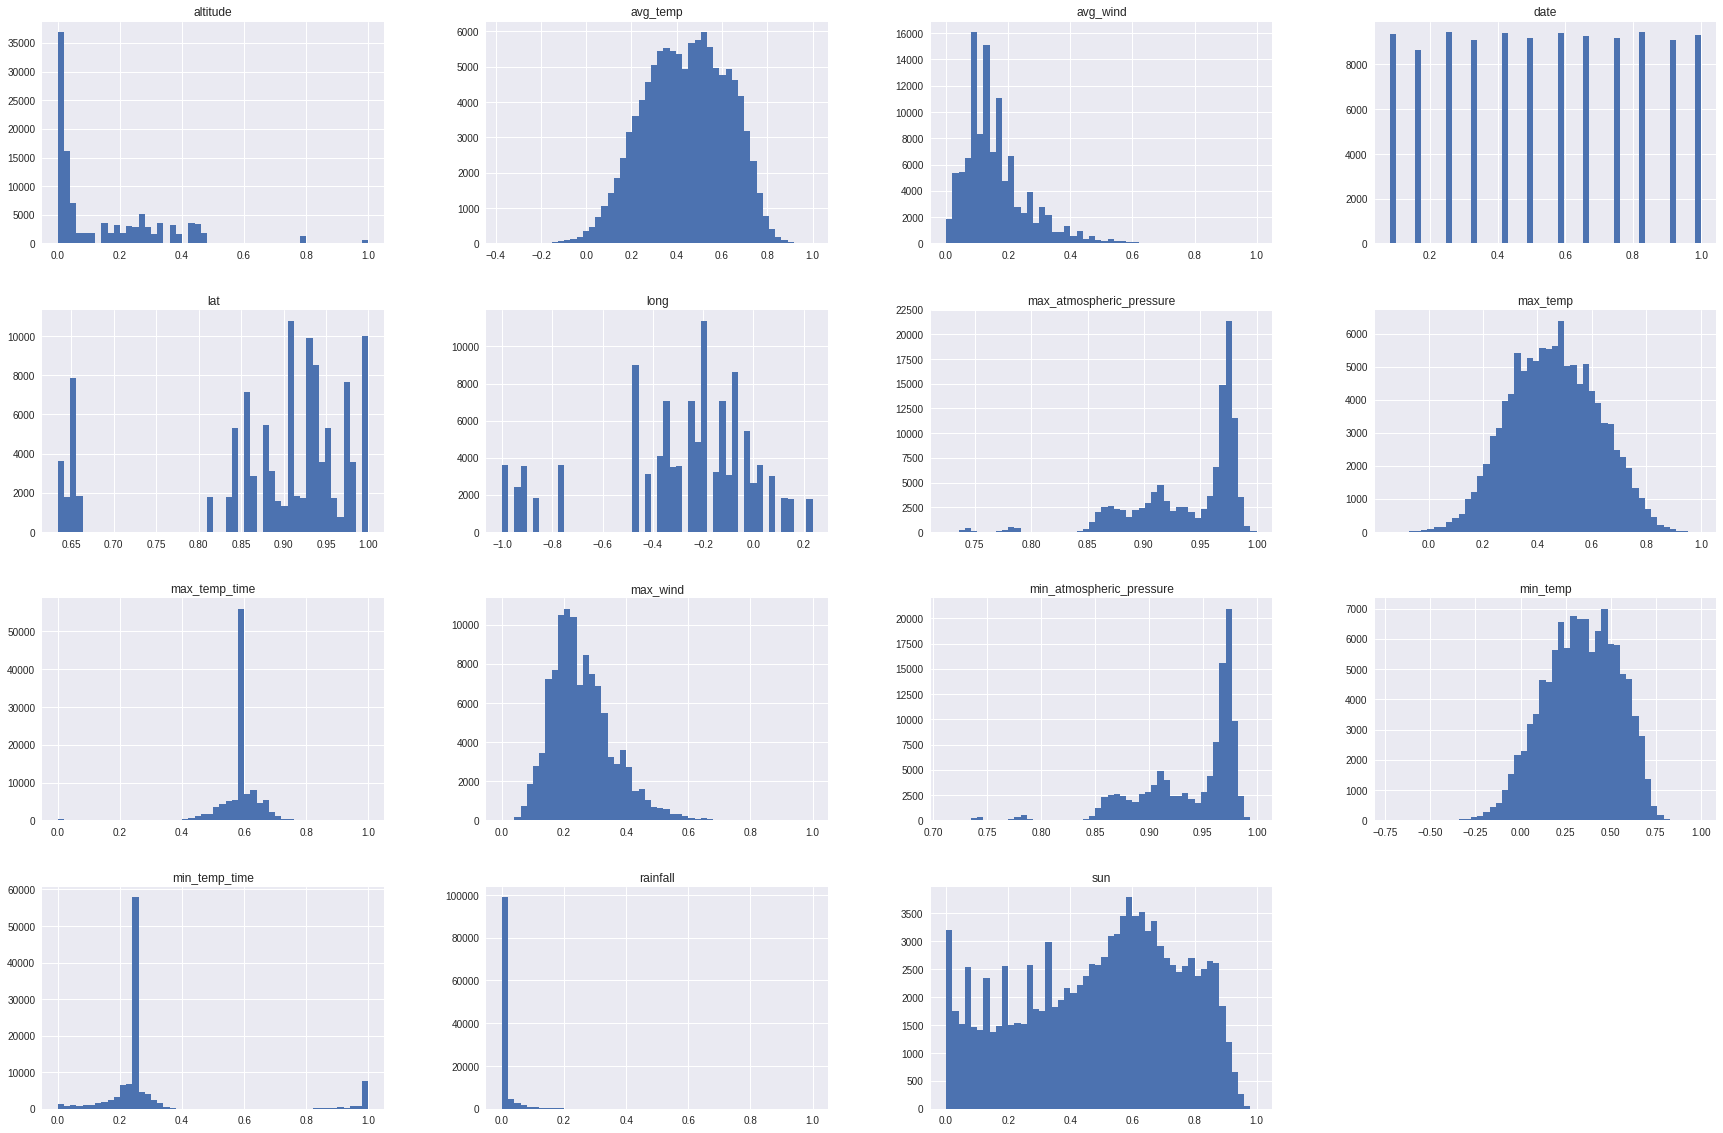

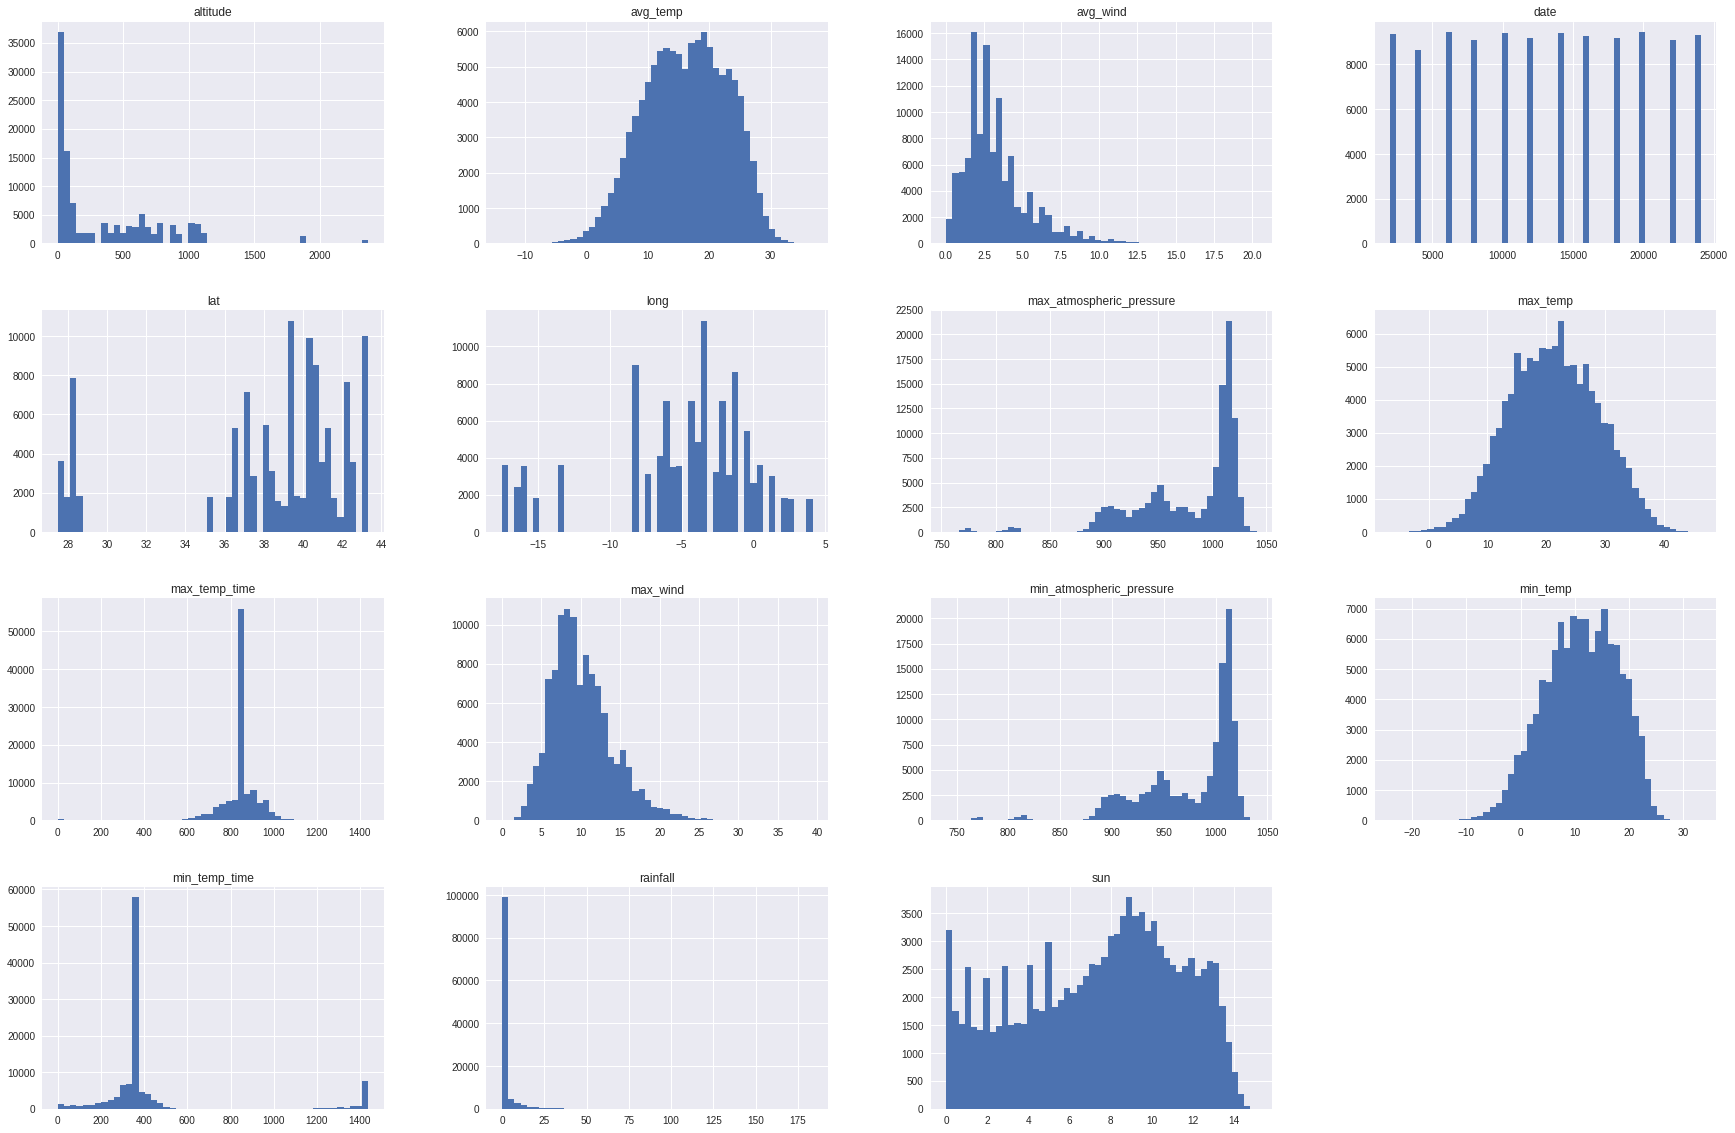

0.9936295350899622


In [0]:
n_components = 10
pca = PCA(n_components= n_components, whiten= True)
clima_numeric = clima.drop('station_id', axis= 1)
scaler = preprocessing.MaxAbsScaler().fit(clima_numeric)
clima_numeric =scaler.transform(clima_numeric)
clima_pc = pca.fit_transform(clima_numeric)
clima_numeric = pd.DataFrame(clima_numeric, columns= clima.columns[1:])
clima_numeric.hist(bins=50, figsize=(30,20))
plt.show()
clima.hist(bins=50, figsize=(30,20))
plt.show()
print(pca.explained_variance_ratio_.sum())


In [0]:
def plot_pca(pca, n_classes):
    for i in range(int(n_classes/2)):
        for j in range(n_classes-1-i):
            plt.scatter(pca[:,i], pca[:,j+i+1], alpha=0.3,c=[x for x in range(pca[:,0].shape[0])],s=60, marker='o', edgecolors='white')
            plt.xlabel('PCA-{}'.format(i)) 
            plt.ylabel('PCA-{}'.format(j+i+1))
            plt.figure(figsize= (20,15))
            plt.show()
plot_pca(clima_pc, n_components)

In [0]:
clima_Y = clima_numeric['rainfall']
clima_X = clima_numeric.drop(['rainfall'], axis =1)

### Tensorflow Vanilla Dense Model

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(19, activation=tf.nn.relu, input_shape=[clima_X.shape[1]]),
    layers.Dense(10, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'acc'])
  return model

In [0]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 19)                285       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
  clima_X, clima_Y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot(), early_stop])


..................

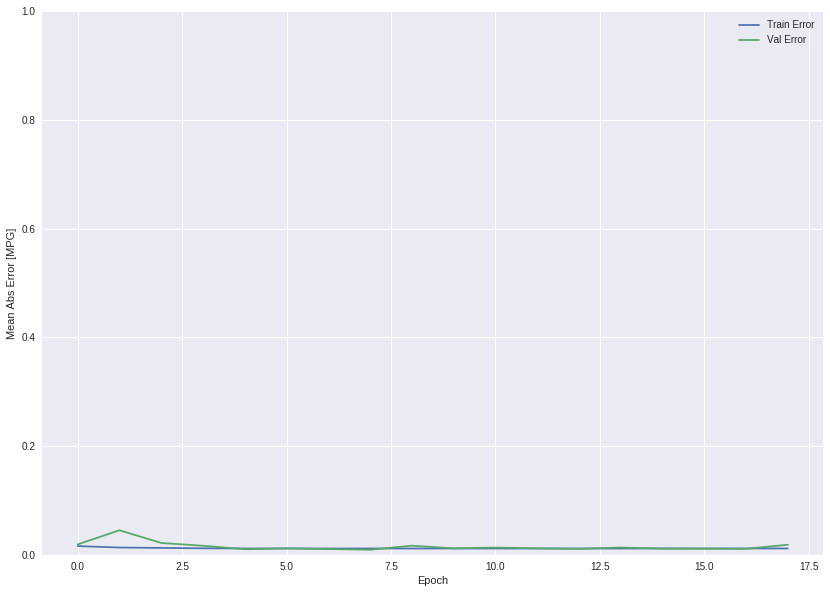

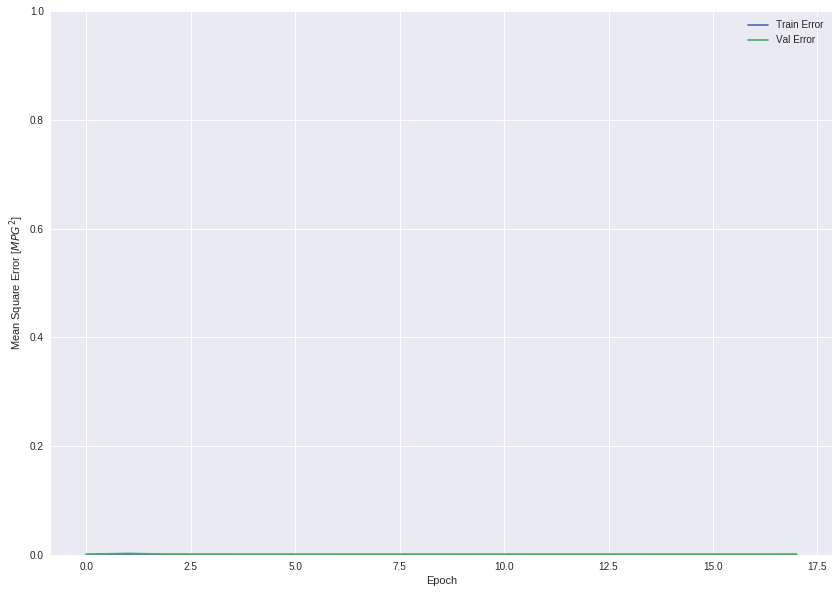

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,1])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,1])

plot_history(history)

In [0]:
history.history['acc'][-1]

0.7170052

## DNNRegressor test
This model didn't show high accuracy

In [0]:
X_train, X_tmp, y_train, y_tmp = train_test_split(clima_X, clima_Y, test_size=0.2, random_state=23) 
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)
feature_cols = [tf.feature_column.numeric_column(col) for col in clima_X.columns]  
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[clima_X.shape[1], 50, 10],
                                      model_dir='tf_wx_model_3')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model_3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcff764f2e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=128):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [0]:
evaluations = []  
STEPS = 400  
for i in range(50): 
    print(':::::::::::::::::::::Loop:{}:::::::::::::::::::::'.format(i))
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

:::::::::::::::::::::Loop:0:::::::::::::::::::::
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use keras.layers.dense instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints

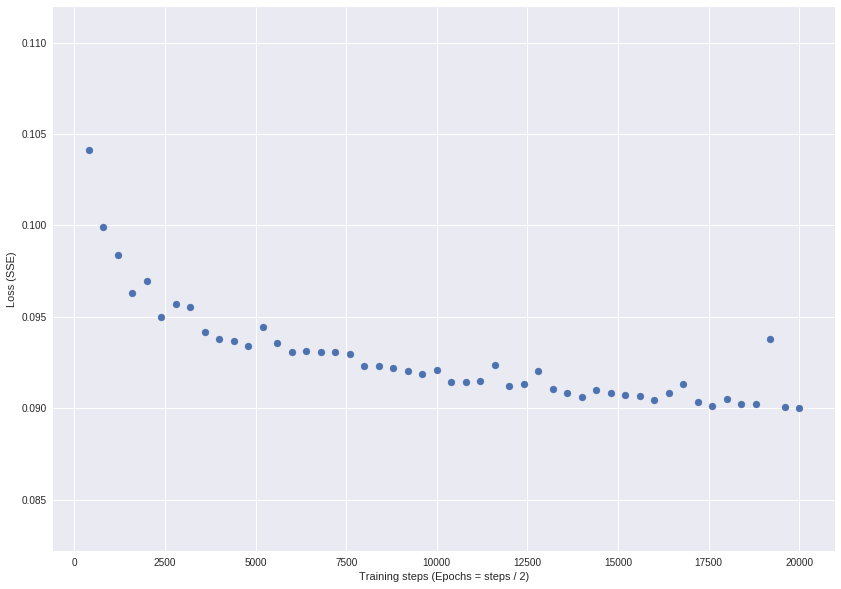

In [0]:
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show()  

In [0]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % metrics.explained_variance_score(  
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f " % metrics.mean_absolute_error(  
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f " % metrics.median_absolute_error(  
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model_3/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.26
The Mean Absolute Error: 0.01 
The Median Absolute Error: 0.00 
